In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, accuracy_score,f1_score, precision_score, recall_score, roc_auc_score
import xgboost as xgb

import joblib


In [2]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-1.2.1-py3-none-win_amd64.whl (86.5 MB)


In [4]:
df=pd.read_csv(r'C:\Users\MAYANK\Downloads\Covid Dataset.csv')

In [5]:
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [6]:
df.isnull().any()

Breathing Problem                          False
Fever                                      False
Dry Cough                                  False
Sore throat                                False
Running Nose                               False
Asthma                                     False
Chronic Lung Disease                       False
Headache                                   False
Heart Disease                              False
Diabetes                                   False
Hyper Tension                              False
Fatigue                                    False
Gastrointestinal                           False
Abroad travel                              False
Contact with COVID Patient                 False
Attended Large Gathering                   False
Visited Public Exposed Places              False
Family working in Public Exposed Places    False
Wearing Masks                              False
Sanitization from Market                   False
COVID-19            

In [7]:
df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


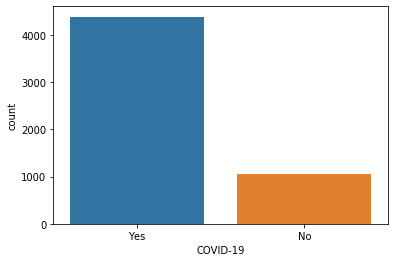

In [8]:
sns.countplot(df['COVID-19'])

In [9]:
l=LabelEncoder()

In [10]:
df=df.apply(l.fit_transform).astype(int)

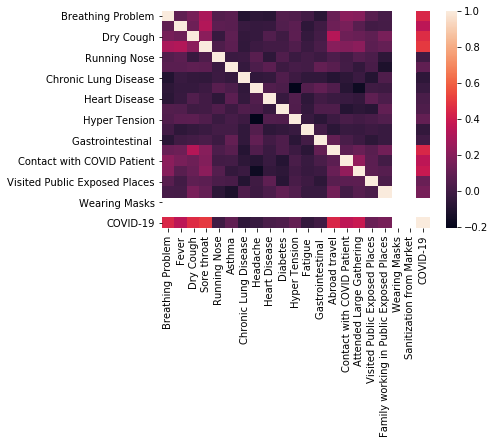

In [11]:
cor=df.corr()
sns.heatmap(cor)

In [12]:
x=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
y=df.iloc[:,[20]]
y = y.values.reshape(-1)
y.shape

(5434,)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=0.2)

In [14]:
print(x_train.shape)
print(x_test.shape)

(4347, 20)
(1087, 20)


In [15]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [16]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
pr=lr.predict(x_test)

In [18]:
print(confusion_matrix(y_test,pr))
print('accuracy is',accuracy_score(y_test,pr))

[[186  20]
 [ 11 870]]
accuracy is 0.9714811407543699


In [20]:
cls=xgb.XGBClassifier()

In [21]:
cls.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
pred=cls.predict(x_test)

In [23]:
confusion=confusion_matrix(y_test,pred)
print('accuracy is',accuracy_score(y_test,pred))
print(confusion)
print(round(1-accuracy_score(y_test, pred),4))

accuracy is 0.9862005519779209
[[203   3]
 [ 12 869]]
0.0138


In [24]:
accuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
f1 = f1_score(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)

print('Accuracy is  :' ,round(accuracy,2)*100)
print('F1 score is :' ,round(f1,2)*100)
print('Precision is  :',round(precision,2)*100)
print('Recall is  :',round(recall,4)*100)
print('Roc Auc is  :',round(roc_auc,2)*100)

Accuracy is  : 99.0
F1 score is : 99.0
Precision is  : 100.0
Recall is  : 98.64
Roc Auc is  : 99.0


In [27]:
joblib.dump(cls,'XGB_model.sav')

['XGB_model.sav']

In [28]:
xgb_loaded=joblib.load('XGB_model.sav')

In [49]:
r = x.iloc[-1:]
r

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market
5433,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0


In [47]:
xgb_loaded.predict(x.iloc[0:1])

array([1])

In [58]:
y[-1]

0

In [56]:
r = [[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]
s = pd.DataFrame(np.array(r), columns=['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache', 'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ', 'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering', 'Visited Public Exposed Places', 'Family working in Public Exposed Places', 'Wearing Masks', 'Sanitization from Market'])
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        1 non-null      int32
 1   Fever                                    1 non-null      int32
 2   Dry Cough                                1 non-null      int32
 3   Sore throat                              1 non-null      int32
 4   Running Nose                             1 non-null      int32
 5   Asthma                                   1 non-null      int32
 6   Chronic Lung Disease                     1 non-null      int32
 7   Headache                                 1 non-null      int32
 8   Heart Disease                            1 non-null      int32
 9   Diabetes                                 1 non-null      int32
 10  Hyper Tension                            1 non-null      int32
 11  Fatigue   

In [57]:
xgb_loaded.predict(s)

array([0])

In [1]:
xgb_loaded.predict(s)

NameError: name 'xgb_loaded' is not defined